<a href="https://colab.research.google.com/github/JedWojtowicz/MAD_jw/blob/main/JW_lab_09_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 9. Statystyka w eksploracyjnej analizie danych

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

df = heart_disease.data.original

## Zadania

**Zadanie 1**

Wykorzystaj zbiór danych [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease), a następnie:
* 1.1 Sprawdź w opisie zbioru danych (data card), które cechy są cechami numerycznymi, a które kategorialnymi. Sprawdź w jaki sposób biblioteka pandas domyślnie wczytuje te dane. Jeżeli w ramce cecha kategorialna jest oznaczona jako numeryczna to zamień ją na kategorialną (pandas posiada typ danych `category`).
* 1.2 Sprawdź czy w zbiorze występują wartości brakujące. Jeżeli tak, to przed wykonaniem kolejnych zadań przygotuj podzbiór danych, który nie będzie zawierał obserwacji z wartościami brakującymi.

In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
df['sex']=df['sex'].astype("category")
df['cp']=df['cp'].astype("category")
df['fbs']=df['fbs'].astype("category")
df['restecg']=df['restecg'].astype("category")
df['exang']=df['exang'].astype("category")
df['slope']=df['slope'].astype("category")
df['thal']=df['thal'].astype("category")

In [ ]:
df.dtypes

,0
age,int64
sex,category
cp,category
trestbps,int64
chol,int64
fbs,category
restecg,category
thalach,int64
exang,category
oldpeak,float64


In [ ]:
#1.2
print(df.isna().sum())
df_hd_nona = df.dropna()
print(df_hd_nona.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


**Zadanie 2**

Dla zbioru danych z zadania 1 oblicz i wyświetl:
* 2.1 Rozkład wartości w kolumnie `num` (Target) - czy dane są zbalansowane? Wyświetl je na wykresie kołowym.
* 2.2 Podstawową statystykę opisową dla każdej cechy numerycznej (min, max, średnia, mediana, odchylenie standardowe, wartość kwantyli 25, 50 oraz 75).
* 2.3 Dominantę (modę) dla każdej cechy kategorialnej.
* 2.4 Wyświetl macierz korelacji Pearsona dla każdej cechy numerycznej zbioru. Wyświetl ją również na wykresie typu mapa cieplna z wykorzystaniem biblioteki seaborn.
* 2.5 Z macierzy korelacji wyświetl nazwy trzech najbardziej skorelowanych cech względem cechy `age` (bezwzględna wartość z korelacji, bez uwzględniania samej cechy `age` w wynikach, która jak wiemy będzie skorelowana sama do siebie w stopniu równym 1).

<Axes: ylabel='count'>

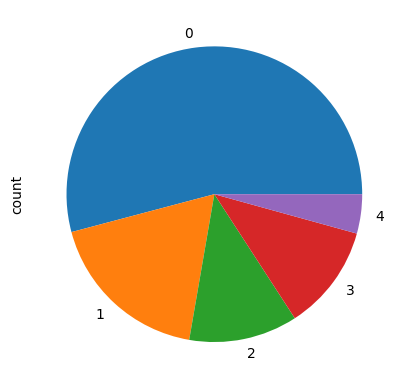

In [ ]:
#2.1
df['num'].value_counts().plot.pie()

In [ ]:
#2.2/2.3
print(df.describe())
print(df.median(numeric_only=True))

              age    trestbps        chol     thalach     oldpeak          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean    54.438944  131.689769  246.693069  149.607261    1.039604    0.672241   
std      9.038662   17.599748   51.776918   22.875003    1.161075    0.937438   
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000   
25%     48.000000  120.000000  211.000000  133.500000    0.000000    0.000000   
50%     56.000000  130.000000  241.000000  153.000000    0.800000    0.000000   
75%     61.000000  140.000000  275.000000  166.000000    1.600000    1.000000   
max     77.000000  200.000000  564.000000  202.000000    6.200000    3.000000   

              num  
count  303.000000  
mean     0.937294  
std      1.228536  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      2.000000  
max      4.000000  
age          56.0
trestbps    130.0
chol        241.0
thalach     153.0
oldpeak       0.8


In [ ]:
#2.3
cat_col = df.dtypes[df.dtypes == 'category'].index
df[cat_col].mode()

#df.select_dtypes('category').mode()

,sex,cp,fbs,restecg,exang,slope,thal
0,1,4,0,0,0,1,3.0


               age  trestbps      chol   thalach   oldpeak        ca       num
age       1.000000  0.284946  0.208950 -0.393806  0.203805  0.362605  0.222853
trestbps  0.284946  1.000000  0.130120 -0.045351  0.189171  0.098773  0.157754
chol      0.208950  0.130120  1.000000 -0.003432  0.046564  0.119000  0.070909
thalach  -0.393806 -0.045351 -0.003432  1.000000 -0.343085 -0.264246 -0.415040
oldpeak   0.203805  0.189171  0.046564 -0.343085  1.000000  0.295832  0.504092
ca        0.362605  0.098773  0.119000 -0.264246  0.295832  1.000000  0.518909
num       0.222853  0.157754  0.070909 -0.415040  0.504092  0.518909  1.000000


<Axes: >

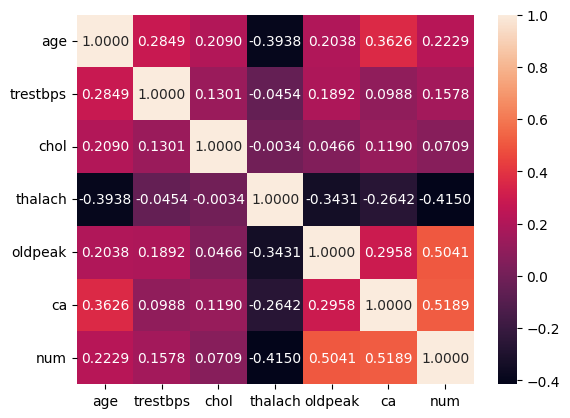

In [ ]:
#2.4
df_pear = df.corr(method ='pearson', numeric_only=True)
print(df_pear)
sns.heatmap(df_pear, annot=True, fmt=".4f")

In [ ]:
#2.5
age_corr = df_pear['age'].drop('age')
top3 = age_corr.abs().sort_values(ascending=False).head(3)
print(top3.index.tolist())

['thalach', 'ca', 'trestbps']



**Zadanie 3**

Do wykonania poniższych poleceń wykorzystaj zbiór [Adult](https://archive.ics.uci.edu/dataset/2/adult). W tym zbiorze również ustaw typy kategorialne dla odpowiednich kolumn zgodnie z opisem zbioru danych.

* 3.1 Na podstawie zbioru bazowego przygotuj dwa podzbiory danych:

  * zbior_1 - losowe 20% wartości ze zbioru oryginalnego (próbkowanie bez uwzględnienia rozkładu dla cechy opisowej - target)
  * zbior_2 - pozostałe 80% wartości bez elementów ze zbioru_1
  * zbior_3 - losowe 20% wartości ze zbioru oryginalnego (próbkowanie z uwzględnieniem rozkładu cechy opisowej)


Następnie porównaj średnią wartość cechy `capital-loss` dla każdej z prób. Jakie jest prawdopodobieństwo, że te próby pochodzą z tej samej populacji?

* 3.2 Wykonaj test t dla prób zależnych dla wartości cechy `capital-gain` przyjmując następującą hipotezę zerową: średnia wartość tej cechy dla `race`='White' jest istotnie wyższa niż dla pozostałych wartości cechy `race`. Przyjmij lub odrzuć przyjętą hipotezę.

* 3.3 Wykorzystując test ANOVA sprawdź jak istotna statystycznie jest różnica średniej wartości cechy `capital-gain` dla każdej z wartości `race` z osobna. Wskaż `p-values` dla tego testu. Jak zinterpretować ten wynik?


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

df_adult = adult.data.original

In [ ]:
df_adult.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
df_adult['native-country']=df_adult['native-country'].astype("category")
df_adult['race']=df_adult['race'].astype("category")
df_adult['relationship']=df_adult['relationship'].astype("category")
df_adult['occupation']=df_adult['occupation'].astype("category")
df_adult['marital-status']=df_adult['marital-status'].astype("category")
df_adult['education']=df_adult['education'].astype("category")
df_adult['workclass']=df_adult['workclass'].astype("category")

In [ ]:
#3.1
zbior_1 = df_adult.sample(frac=0.2)
zbior_2 = df_adult.drop(zbior_1.index)
zbior_3 = df_adult.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))

<ipython-input-20-048d70cf8cc1>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  zbior_3 = df_adult.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))


In [ ]:
#3.2

In [ ]:
#3.3


**Zadanie 4**

Wykonaj test Chi square dla wartości cechy `capital-income` dla dwóch grup:
* ludzie w wieku < 40 lat
* ludzie w wieku >= 40 lat

Wyświetl wyniki tego testu.